# Library Requirements

In [2]:
!pip install pydeck

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import pydeck as pdk
from shapely.geometry import MultiPoint
import statsmodels.formula.api as smf

# Pre-Processing 
1. Read the CSV file and explore the datasets.
2. Remove NA values.
3. Convert the column from object to boolean type of variable or better to read. 

In [4]:
# Read the CSV files
df = pd.read_csv("real-estate-data.csv")
df.head()

id_ ward  beds  baths  DEN            size parking exposure  D_mkt  \
0  219129  W13   3.0      3   No  1500-1999 sqft       N       No   16.0   
1  757581  W13   1.0      1  YES    500-999 sqft     Yes       We   23.0   
2  404196  W13   2.0      2  YES    500-999 sqft     Yes       We   12.0   
3  821441  W13   2.0      2   No    500-999 sqft     Yes        S   10.0   
4  612090  W10   2.0      1   No             NaN       N        S    5.0   

   building_age   maint      price         lt         lg  
0             9  1087.0  1821000.0  43.617997 -79.392383  
1             3   469.0   613000.0  43.648968 -79.390031  
2             1   767.0   838000.0  43.641045 -79.375436  
3            25   827.0   935000.0  43.642122 -79.370250  
4             1     NaN  1328000.0  43.692210 -79.365015

In [5]:
# Shape of the dataset and data types
print(df.shape)
print(df.dtypes)

(3042, 14)
id_               int64
ward             object
beds            float64
baths             int64
DEN              object
size             object
parking          object
exposure         object
D_mkt           float64
building_age      int64
maint           float64
price           float64
lt              float64
lg              float64
dtype: object


In [6]:
# Count missing values for each column
missing_values = df.isna().sum()
print(missing_values)

id_              0
ward             0
beds            54
baths            0
DEN              0
size            53
parking          0
exposure         0
D_mkt           93
building_age     0
maint           45
price           61
lt               0
lg               0
dtype: int64


In [7]:
# Drop NA values
df = df.dropna()
df.shape

(2749, 14)

In [8]:
# Check the unique values from each column to get the sense of the dataset

for col in df.columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 40)

Unique values in 'id_':
[219129 757581 404196 ... 476334 413482 484367]
----------------------------------------
Unique values in 'ward':
['W13' 'W10' 'W11']
----------------------------------------
Unique values in 'beds':
[3. 1. 2. 0.]
----------------------------------------
Unique values in 'baths':
[3 1 2]
----------------------------------------
Unique values in 'DEN':
['No' 'YES']
----------------------------------------
Unique values in 'size':
['1500-1999 sqft' '500-999 sqft' '2000-2499 sqft' '1000-1499 sqft'
 '0-499 sqft' '5500-3999 sqft' '2500-2999 sqft' '3000-3499 sqft'
 '4000+ sqft']
----------------------------------------
Unique values in 'parking':
['N' 'Yes']
----------------------------------------
Unique values in 'exposure':
['No' 'We' 'S' 'E']
----------------------------------------
Unique values in 'D_mkt':
[ 16.  23.  12.  10.   1.   4.   5.  13.  19.  37.   3.  54.   2.   6.
  24.  27.   0.  28.  33.  30.  45.  26.  43.  17.  15.   8.  29.  35.
  20.   7.  34. 

In [9]:
# Convert boolean-like categorical variables to binary format
df["DEN"] = df["DEN"].map({"YES": 1, "No": 0}).astype(int)
df["parking"] = df["parking"].map({"Yes": 1, "N": 0}).astype(int)
df["exposure"] = df["exposure"].map({"No": "North", "We": "West", "S": "South", "E": "East"})

In [10]:
# After doing the pre-processing, unique values of our data types

for col in df.columns:
    print(f"Unique values in '{col}':")
    print(df[col].unique())
    print("-" * 40)

Unique values in 'id_':
[219129 757581 404196 ... 476334 413482 484367]
----------------------------------------
Unique values in 'ward':
['W13' 'W10' 'W11']
----------------------------------------
Unique values in 'beds':
[3. 1. 2. 0.]
----------------------------------------
Unique values in 'baths':
[3 1 2]
----------------------------------------
Unique values in 'DEN':
[0 1]
----------------------------------------
Unique values in 'size':
['1500-1999 sqft' '500-999 sqft' '2000-2499 sqft' '1000-1499 sqft'
 '0-499 sqft' '5500-3999 sqft' '2500-2999 sqft' '3000-3499 sqft'
 '4000+ sqft']
----------------------------------------
Unique values in 'parking':
[0 1]
----------------------------------------
Unique values in 'exposure':
['North' 'West' 'South' 'East']
----------------------------------------
Unique values in 'D_mkt':
[ 16.  23.  12.  10.   1.   4.   5.  13.  19.  37.   3.  54.   2.   6.
  24.  27.   0.  28.  33.  30.  45.  26.  43.  17.  15.   8.  29.  35.
  20.   7.  34.  

# Exploratory Data Analysis

## Distribution of House Prices

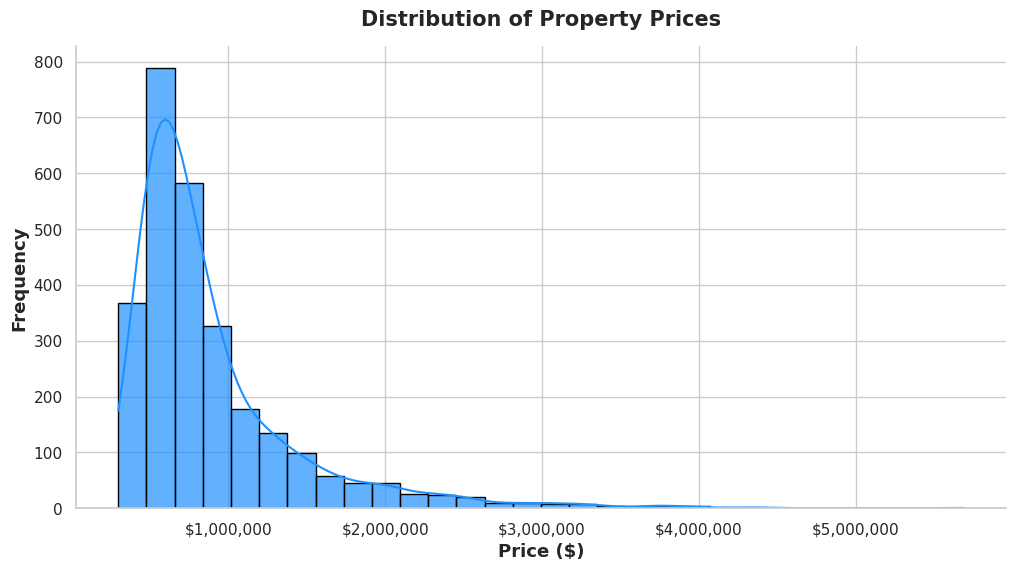

In [11]:
# Set a modern style
sns.set_theme(style="whitegrid")

# Create an enhanced histogram with KDE (Kernel Density Estimation)
plt.figure(figsize=(12, 6))
ax = sns.histplot(df["price"], bins=30, kde=True, color="dodgerblue", edgecolor="black", alpha=0.7)

# Format x-axis for price display
ax.xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Customize appearance
plt.xlabel("Price ($)", fontsize=13, fontweight="bold")
plt.ylabel("Frequency", fontsize=13, fontweight="bold")
plt.title("Distribution of Property Prices", fontsize=15, fontweight="bold", pad=15)

# Remove top and right borders for a cleaner look
sns.despine()

# Show the plot
plt.show()

## Distribution of Property Prices by Bedrooms and Den Presence

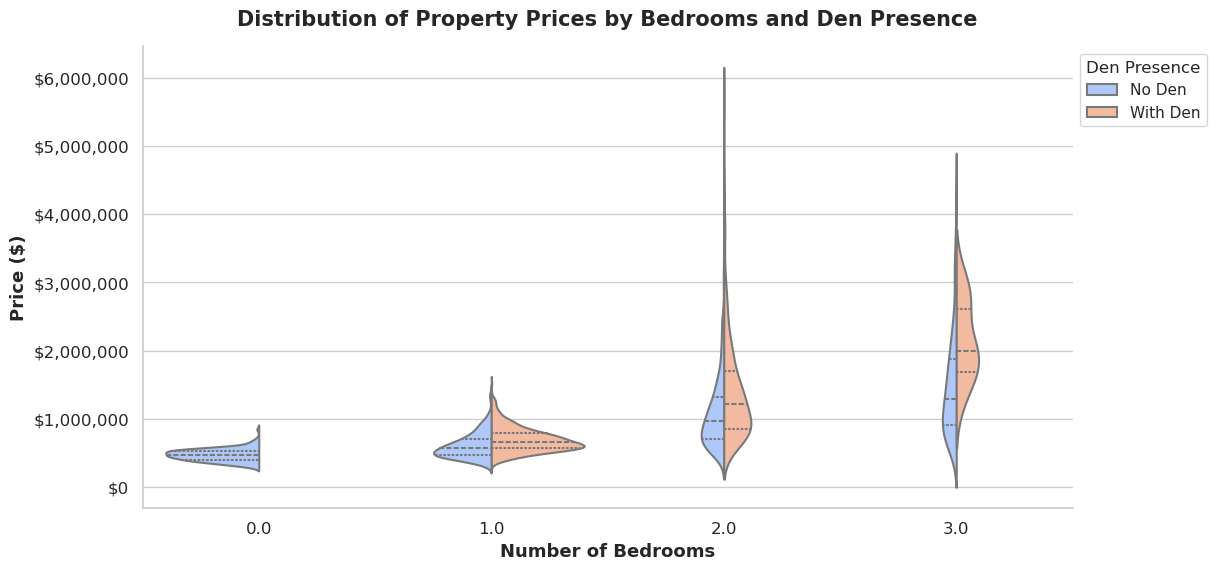

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Ensure 'DEN' column exists and fill NaN values if necessary
if "DEN" in df.columns:
    df["DEN"] = df["DEN"].fillna(0)  # Replace missing values with 0
    df["DEN"] = df["DEN"].map({1: "With Den", 0: "No Den"})  # Convert to readable format
else:
    raise KeyError("Column 'DEN' not found in DataFrame")

# Set an enhanced modern style
sns.set_theme(style="whitegrid")

# Create the violin plot
plt.figure(figsize=(12, 6))
ax = sns.violinplot(
    x="beds", y="price", hue="DEN", data=df, palette="coolwarm", split=True, inner="quartile", linewidth=1.5, saturation=0.9
)

# Format y-axis for price display
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Customize appearance
plt.xlabel("Number of Bedrooms", fontsize=13, fontweight="bold")
plt.ylabel("Price ($)", fontsize=13, fontweight="bold")
plt.title("Distribution of Property Prices by Bedrooms and Den Presence", fontsize=15, fontweight="bold", pad=15)

# Improve x-axis readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend with better positioning
plt.legend(title="Den Presence", title_fontsize="12", loc="upper left", bbox_to_anchor=(1, 1))

# Remove top and right borders for a cleaner look
sns.despine()

# Show the plot
plt.show()



## Distribution of Exposure vs Price

/tmp/ipykernel_167/1739831996.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


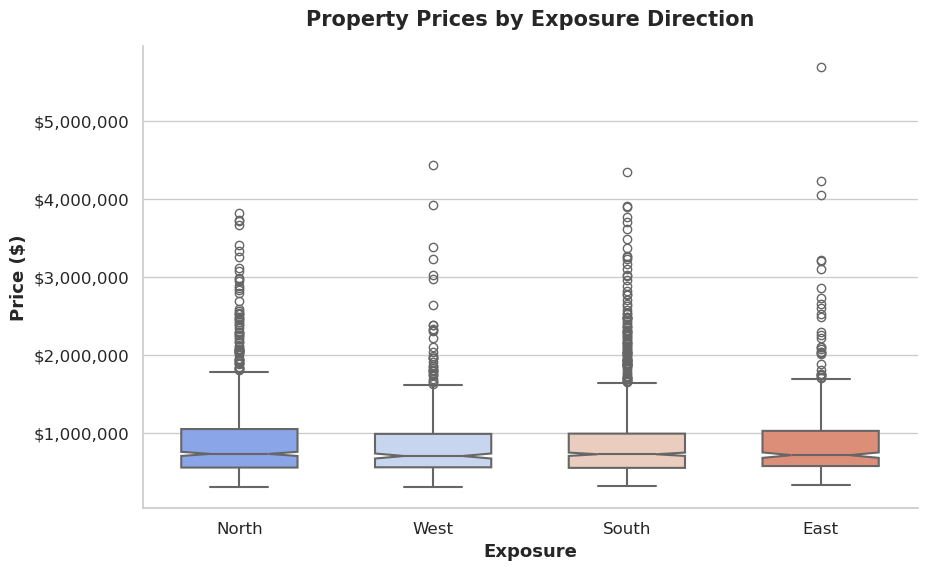

In [13]:
# Set a modern style
sns.set_theme(style="whitegrid")

# Create an enhanced boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(
    x="exposure", y="price", data=df, palette="coolwarm", linewidth=1.5, notch=True, width=0.6
)

# Format y-axis for price display
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Customize appearance
plt.xlabel("Exposure", fontsize=13, fontweight="bold")
plt.ylabel("Price ($)", fontsize=13, fontweight="bold")
plt.title("Property Prices by Exposure Direction", fontsize=15, fontweight="bold", pad=15)

# Improve x-axis readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove top and right borders for a cleaner look
sns.despine()

# Show the plot
plt.show()

## Distribution of Day in the Market vs Price

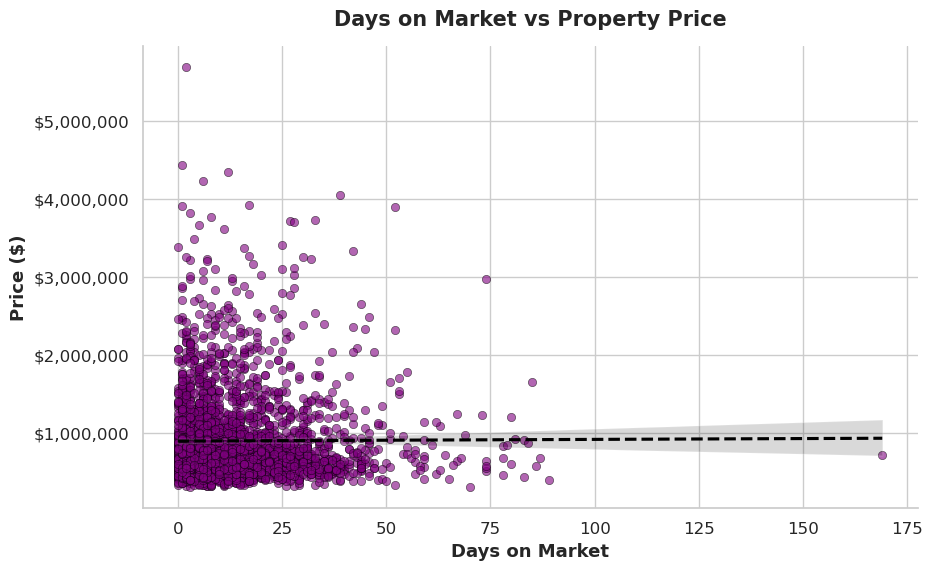

In [14]:
# Set a modern style
sns.set_theme(style="whitegrid")

# Create an enhanced scatter plot
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    x=df["D_mkt"], y=df["price"], alpha=0.6, color="purple", edgecolor="black"
)

# Add a trend line using regression (without confidence interval for clarity)
sns.regplot(
    x=df["D_mkt"], y=df["price"], scatter=False, color="black", line_kws={"linestyle": "dashed"}
)

# Format y-axis for price display
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Customize appearance
plt.xlabel("Days on Market", fontsize=13, fontweight="bold")
plt.ylabel("Price ($)", fontsize=13, fontweight="bold")
plt.title("Days on Market vs Property Price", fontsize=15, fontweight="bold", pad=15)

# Improve x-axis readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove top and right borders for a cleaner look
sns.despine()

# Show the plot
plt.show()

## Distribution of Age of Building vs Property Price

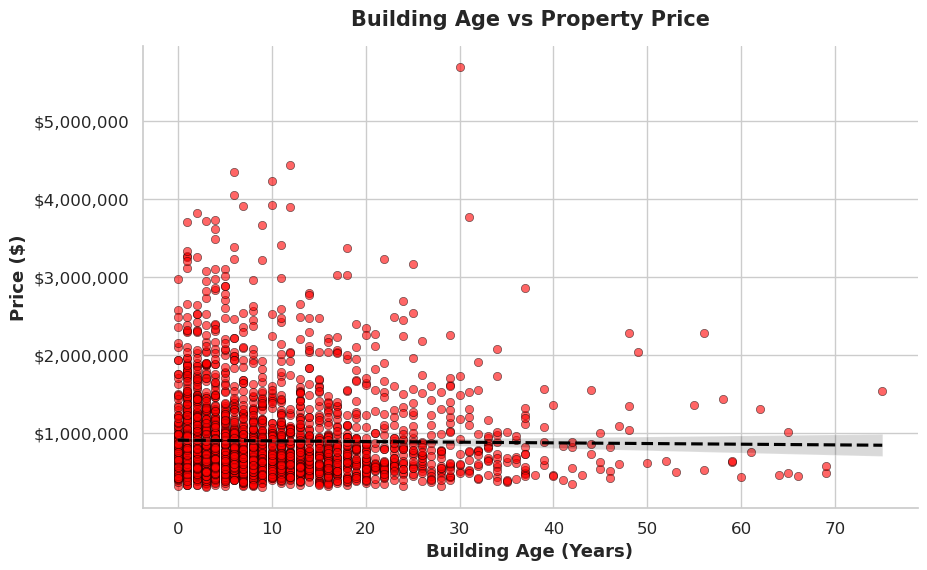

In [15]:
# Set a modern style
sns.set_theme(style="whitegrid")

# Create an enhanced scatter plot for Building Age vs Price
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    x=df["building_age"], y=df["price"], alpha=0.6, color="red", edgecolor="black"
)

# Add a trend line using regression (without confidence interval for clarity)
sns.regplot(
    x=df["building_age"], y=df["price"], scatter=False, color="black", line_kws={"linestyle": "dashed"}
)

# Format y-axis for price display
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Customize appearance
plt.xlabel("Building Age (Years)", fontsize=13, fontweight="bold")
plt.ylabel("Price ($)", fontsize=13, fontweight="bold")
plt.title("Building Age vs Property Price", fontsize=15, fontweight="bold", pad=15)

# Improve x-axis readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove top and right borders for a cleaner look
sns.despine()

# Show the plot
plt.show()

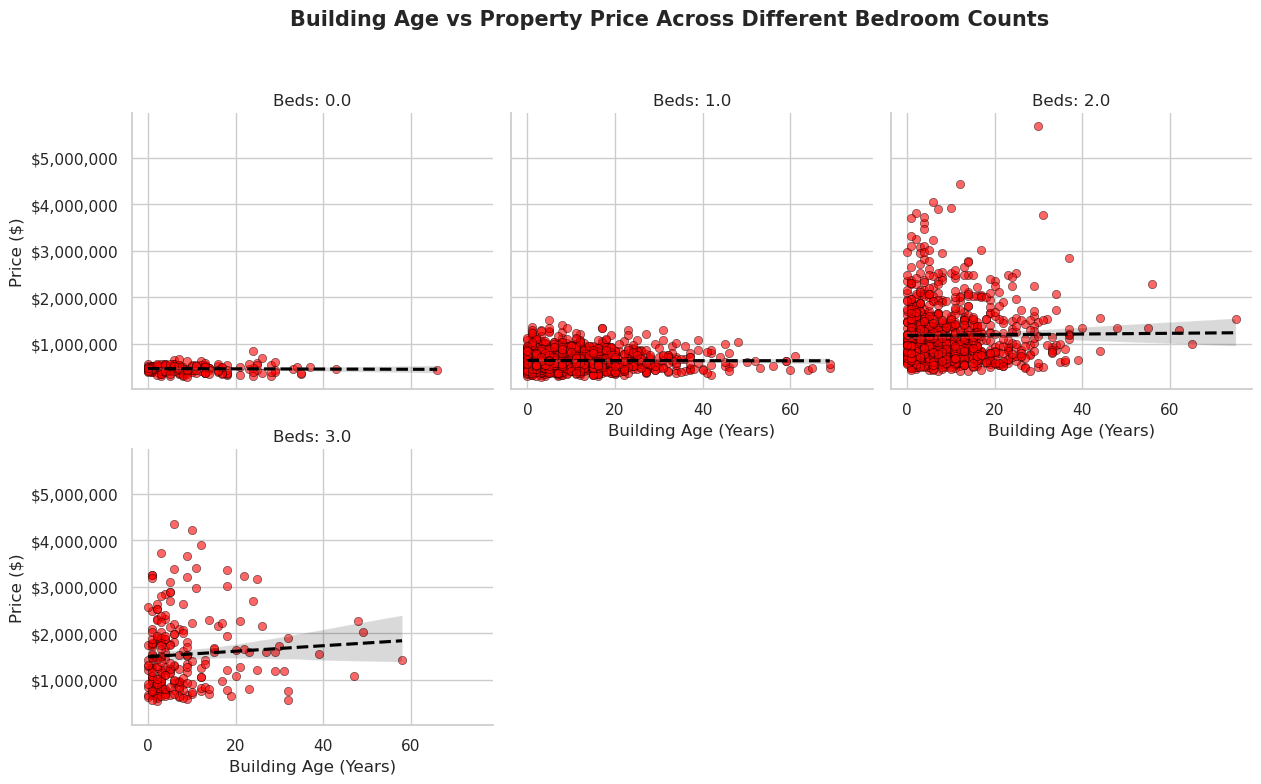

In [16]:
# Set a modern style
sns.set_theme(style="whitegrid")

# Create FacetGrid for Building Age vs Price divided by number of bedrooms
g = sns.FacetGrid(df, col="beds", col_wrap=3, height=4, sharex=True, sharey=True)
g.map_dataframe(sns.scatterplot, x="building_age", y="price", alpha=0.6, color="red", edgecolor="black")

# Add regression lines to each facet
g.map_dataframe(sns.regplot, x="building_age", y="price", scatter=False, color="black", line_kws={"linestyle": "dashed"})

# Format y-axis for price display
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Customize titles and labels
g.set_axis_labels("Building Age (Years)", "Price ($)")
g.set_titles(col_template="Beds: {col_name}")

# Improve readability
plt.subplots_adjust(top=0.85)
g.fig.suptitle("Building Age vs Property Price Across Different Bedroom Counts", fontsize=15, fontweight="bold")

# Show the plot
plt.show()

## Distribution of Parking vs Price

/tmp/ipykernel_167/2334326543.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


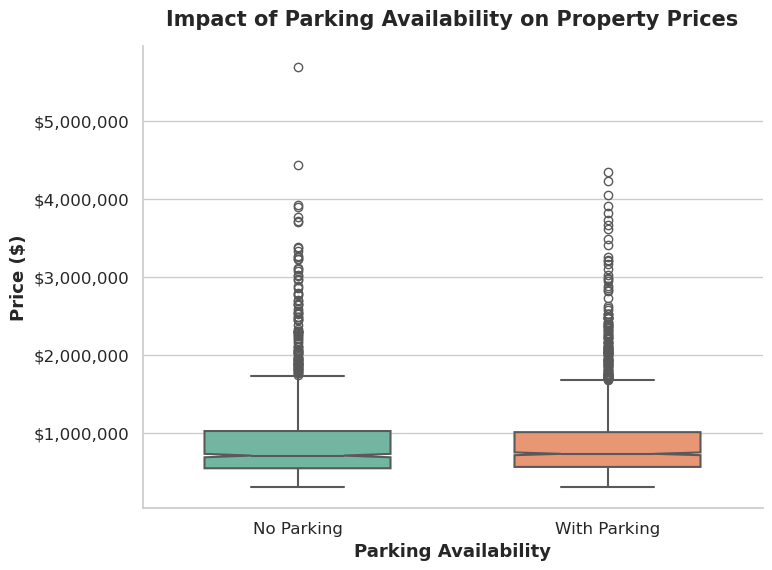

In [17]:
# Set a modern style
sns.set_theme(style="whitegrid")

# Convert 'parking' column to a readable format
df["parking"] = df["parking"].map({1: "With Parking", 0: "No Parking"})

# Create an enhanced boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    x="parking", y="price", data=df, palette="Set2", linewidth=1.5, notch=True, width=0.6
)

# Format y-axis for price display
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Customize appearance
plt.xlabel("Parking Availability", fontsize=13, fontweight="bold")
plt.ylabel("Price ($)", fontsize=13, fontweight="bold")
plt.title("Impact of Parking Availability on Property Prices", fontsize=15, fontweight="bold", pad=15)

# Improve x-axis readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Remove top and right borders for a cleaner look
sns.despine()

# Show the plot
plt.show()

## Distribution of Property Prices by Size

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Set a modern style
sns.set_theme(style="whitegrid")

# Create the violin plot with an enhanced color palette
plt.figure(figsize=(12, 6))
ax = sns.violinplot(
    x="size", y="price", data=df, order=size_order, palette="coolwarm", inner="quartile", linewidth=1.2
)

# Format y-axis to display full price values (e.g., $500K, $1M, etc.)
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Customize the appearance
plt.xlabel("Size Category", fontsize=12, fontweight="bold")
plt.ylabel("Price ($)", fontsize=12, fontweight="bold")
plt.title("Distribution of Property Prices by Size", fontsize=14, fontweight="bold", pad=15)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)

# Remove top and right borders for a cleaner look
sns.despine()

# Show the plot
plt.show()

NameError: name 'size_order' is not defined

<Figure size 1200x600 with 0 Axes>

## High Correlation between Beds and Baths

In [19]:
import numpy as np

correlation = df["beds"].corr(df["baths"])
print(f"Correlation between beds and baths: {correlation:.2f}")


Correlation between beds and baths: 0.75


## Scatterplot of Maintence Cost vs Property Price

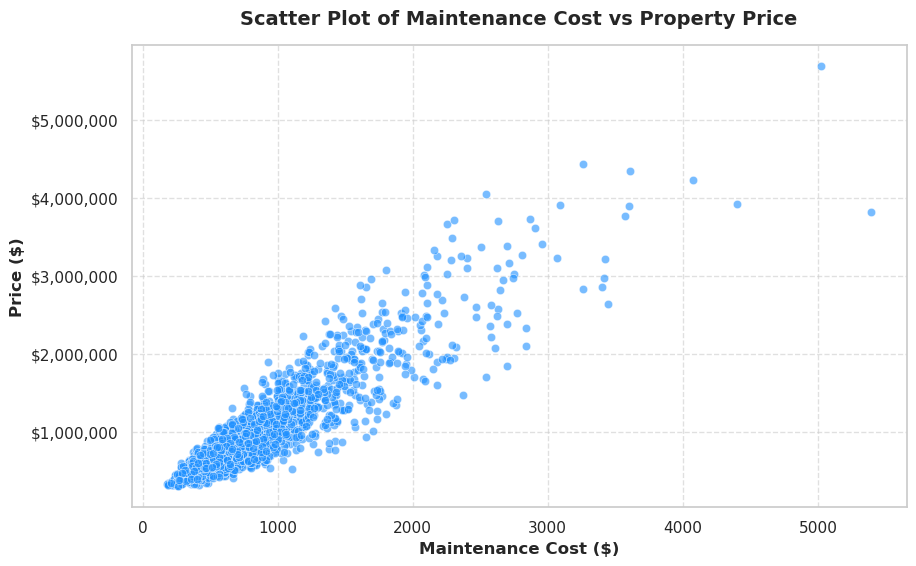

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

# Set a modern style
sns.set_theme(style="whitegrid")

# Create the scatter plot
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x="maint", y="price", data=df, alpha=0.6, color="dodgerblue")

# Format y-axis to display full price values
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'${x:,.0f}'))

# Customize appearance
plt.xlabel("Maintenance Cost ($)", fontsize=12, fontweight="bold")
plt.ylabel("Price ($)", fontsize=12, fontweight="bold")
plt.title("Scatter Plot of Maintenance Cost vs Property Price", fontsize=14, fontweight="bold", pad=15)

# Improve grid visibility
plt.grid(True, linestyle="--", alpha=0.6)

# Show the plot
plt.show()

In [21]:
import folium
from folium.plugins import MarkerCluster

# Initialize a map centered around Toronto
m = folium.Map(location=[df["lt"].mean(), df["lg"].mean()], zoom_start=12)

# Define a price-based color scale
def price_color(price):
    if price < 500000:
        return "green"
    elif 500000 <= price < 1000000:
        return "blue"
    elif 1000000 <= price < 1500000:
        return "orange"
    else:
        return "red"

# Add markers for each property
marker_cluster = MarkerCluster().add_to(m)
for _, row in df.iterrows():
    folium.Marker(
        location=[row["lt"], row["lg"]],
        popup=f"Price: ${row['price']:,.0f}\nBeds: {row['beds']}\nBaths: {row['baths']}",
        icon=folium.Icon(color=price_color(row["price"]))
    ).add_to(marker_cluster)

# Display map
m.save("property_map.html")  # Saves map as an HTML file (open in browser)
m


In [27]:
# 1. Load your CSV data (ensure "real-estate-data.csv" is in your working directory)
df = pd.read_csv("real-estate-data.csv")
df = df.dropna(subset=["lt", "lg", "price", "ward"])

# 2. Define an elevation scale for the bars
elevation_scale = 0.0002

# 3. Define a function to map price to a color for the 3D bars
def price_to_color(price):
    min_price, max_price = 500000, 2500000
    ratio = (price - min_price) / (max_price - min_price + 1e-9)
    ratio = max(0, min(ratio, 1))
    r = int(150 + ratio * (255 - 150))
    g = int(ratio * 255)
    b = int(150 - ratio * 150)
    return [r, g, b]

df["bar_color"] = df["price"].apply(price_to_color)

# 4. Create a ColumnLayer for property data (bars colored by price)
column_layer = pdk.Layer(
    "ColumnLayer",
    data=df,
    get_position=["lg", "lt"],    # [longitude, latitude]
    get_elevation="price",         # Height based on price
    elevation_scale=elevation_scale,
    radius=25,                     # Skinnier columns
    get_fill_color="bar_color",    # Color by price
    pickable=True,
    extruded=True,
    auto_highlight=True,
)

# 5. Compute maximum elevation so we can position ward labels above the bars
max_price_val = df["price"].max()
max_elevation = max_price_val * elevation_scale
label_elevation = max_elevation + 50  # Place label 50 units above the tallest bar

# 6. Group by ward and compute a convex hull (or fallback rectangle) for each ward
ward_regions = []
# Define a color mapping for the wards:
ward_color_map = {
    "W10": [255, 99, 71],   # Tomato (e.g., Spadina-Fort York)
    "W11": [60, 179, 113],  # Medium Sea Green (e.g., University-Rosedale)
    "W13": [65, 105, 225]   # Royal Blue (e.g., Toronto Centre)
}

unique_wards = df["ward"].unique()
for ward in unique_wards:
    group = df[df["ward"] == ward]
    points = list(zip(group["lg"], group["lt"]))
    if len(points) < 3:
        # Fallback: create a rectangle covering the points
        min_lg = group["lg"].min()
        max_lg = group["lg"].max()
        min_lt = group["lt"].min()
        max_lt = group["lt"].max()
        polygon = [
            [min_lg, min_lt],
            [min_lg, max_lt],
            [max_lg, max_lt],
            [max_lg, min_lt],
            [min_lg, min_lt]  # Close the polygon
        ]
        centroid_lg = (min_lg + max_lg) / 2
        centroid_lt = (min_lt + max_lt) / 2
    else:
        convex_hull = MultiPoint(points).convex_hull
        polygon = list(convex_hull.exterior.coords)
        centroid_lg = convex_hull.centroid.x
        centroid_lt = convex_hull.centroid.y
    fill_color = ward_color_map.get(ward, [200, 200, 200])
    ward_regions.append({
        "ward": ward,
        "polygon": polygon,
        "fill_color": fill_color,
        "center_lg": centroid_lg,
        "center_lt": centroid_lt
    })

df_wards = pd.DataFrame(ward_regions)

# 7. Create a PolygonLayer for the ward regions (colored only where data exists)
polygon_layer = pdk.Layer(
    "PolygonLayer",
    data=df_wards,
    get_polygon="polygon",
    get_fill_color="fill_color",
    get_line_color=[255, 255, 255],
    pickable=False,     # Disable tooltips on polygons
    stroked=True,
    extruded=False,     # Flat polygons
    opacity=0.3,        # Semi-transparent for a polished look
)

# 8. Create a TextLayer for ward labels, positioned at each ward's centroid at a fixed elevation
text_layer = pdk.Layer(
    "TextLayer",
    data=df_wards,
    get_position=["center_lg", "center_lt", label_elevation],
    get_text="ward",
    get_color=[255, 255, 255],
    get_size=32,                   # Large font for presentation
    get_alignment_baseline="'bottom'",
    pickable=False,
)

# 9. Set the initial view centered on your data points
center_lat = df["lt"].mean()
center_lg = df["lg"].mean()
view_state = pdk.ViewState(
    latitude=center_lat,
    longitude=center_lg,
    zoom=12,
    pitch=50,  # Tilt for a good 3D perspective
)

# 10. Create the Deck with three layers:
#      - PolygonLayer: colored ward regions (covering only the area with data)
#      - ColumnLayer: 3D property bars (colored by price)
#      - TextLayer: ward labels above the bars
deck = pdk.Deck(
    layers=[polygon_layer, column_layer, text_layer],
    initial_view_state=view_state,
    map_style="https://basemaps.cartocdn.com/gl/dark-matter-gl-style/style.json",
    tooltip={"text": "Price: {price}\nBeds: {beds}\nBaths: {baths}\nWard: {ward}"}
)

# 11. Export the map to an HTML file
deck.to_html("geospatial.html")

# 12. Inject a custom HTML legend into the exported HTML file
legend_html = """
<div id="legend" style="position: absolute; top: 20px; right: 20px; background: rgba(255,255,255,0.8); padding: 10px; border-radius: 5px; font-family: sans-serif; z-index: 9999;">
  <div><span style="display:inline-block; width:12px; height:12px; background: rgb(255,99,71); margin-right:5px;"></span>W10 Spadina-Fort York</div>
  <div><span style="display:inline-block; width:12px; height:12px; background: rgb(60,179,113); margin-right:5px;"></span>W11 University-Rosedale</div>
  <div><span style="display:inline-block; width:12px; height:12px; background: rgb(65,105,225); margin-right:5px;"></span>W13 Toronto Centre</div>
</div>
"""

html_file = "geospatial.html"
with open(html_file, "r", encoding="utf-8") as f:
    html_content = f.read()

# Insert the legend right after the <body> tag
modified_html = html_content.replace("<body>", "<body>" + legend_html, 1)

with open("geospatial_with_legend.html", "w", encoding="utf-8") as f:
    f.write(modified_html)

print("Map with legend saved as 'geospatial_with_legend.html'")

Map with legend saved as 'geospatial_with_legend.html'


# Basic Model

## Simple Linear Model

In [ ]:
model = smf.ols('price ~ ward + beds + baths + DEN + size + parking + exposure + D_mkt + building_age + maint + lt + lg', data=df).fit()
print(model.summary())